## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-1, 1e-3, 1e-3, 1e-5, 1e-5]
EPOCHS = 50
BATCH_SIZE = 3072 # 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for idx, lr in enumerate(LEARNING_RATE):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    use_nesterov = (idx % 2 == 0)
    if use_nesterov:
        print("Experiment with LR = %.6f (w/ nesterov)" % (lr))
    else:
        print("Experiment with LR = %.6f (w/o nesterov)" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=use_nesterov, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    if use_nesterov:
        exp_name_tag = "exp-lr-%s (w/ nesterov)" % str(lr)
    else:
        exp_name_tag = "exp-lr-%s (w/o nesterov)" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000 (w/ nesterov)


W0715 22:23:32.337458  2160 deprecation.py:323] From C:\Users\qwerz\Miniconda3\envs\ML100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total params: 404,378
Trainable params: 404,378
Non-trainable params: 0
_______________________________________________________

Epoch 48/50
50000/50000 [==============================] - 2s 39us/sample - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 40us/sample - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Experiment with LR = 0.100000 (w/o nesterov)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
____________________________

50000/50000 [==============================] - 2s 37us/sample - loss: 1.4226 - accuracy: 0.4861 - val_loss: 1.4904 - val_accuracy: 0.4719
Epoch 45/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.3986 - accuracy: 0.4965 - val_loss: 1.4639 - val_accuracy: 0.4800
Epoch 46/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.3867 - accuracy: 0.5027 - val_loss: 1.4740 - val_accuracy: 0.4736
Epoch 47/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.3968 - accuracy: 0.4966 - val_loss: 1.5021 - val_accuracy: 0.4667
Epoch 48/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.4220 - accuracy: 0.4899 - val_loss: 1.4920 - val_accuracy: 0.4741
Epoch 49/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.3897 - accuracy: 0.5009 - val_loss: 1.4987 - val_accuracy: 0.4752
Epoch 50/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.3820 - accuracy: 0.5078 - va

50000/50000 [==============================] - 2s 37us/sample - loss: 1.7515 - accuracy: 0.3785 - val_loss: 1.7561 - val_accuracy: 0.3795
Epoch 41/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7464 - accuracy: 0.3807 - val_loss: 1.7518 - val_accuracy: 0.3775
Epoch 42/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7418 - accuracy: 0.3812 - val_loss: 1.7467 - val_accuracy: 0.3806
Epoch 43/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7371 - accuracy: 0.3837 - val_loss: 1.7422 - val_accuracy: 0.3816
Epoch 44/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7323 - accuracy: 0.3854 - val_loss: 1.7387 - val_accuracy: 0.3839
Epoch 45/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7279 - accuracy: 0.3876 - val_loss: 1.7340 - val_accuracy: 0.3847
Epoch 46/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7235 - accuracy: 0.3887 - va

50000/50000 [==============================] - 2s 36us/sample - loss: 1.8023 - accuracy: 0.3442 - val_loss: 1.7972 - val_accuracy: 0.3478
Epoch 37/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7961 - accuracy: 0.3471 - val_loss: 1.7919 - val_accuracy: 0.3483
Epoch 38/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7906 - accuracy: 0.3503 - val_loss: 1.7877 - val_accuracy: 0.3507
Epoch 39/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7858 - accuracy: 0.3534 - val_loss: 1.7807 - val_accuracy: 0.3564
Epoch 40/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7797 - accuracy: 0.3546 - val_loss: 1.7756 - val_accuracy: 0.3573
Epoch 41/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7749 - accuracy: 0.3576 - val_loss: 1.7714 - val_accuracy: 0.3591
Epoch 42/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7699 - accuracy: 0.3604 - va

50000/50000 [==============================] - 2s 36us/sample - loss: 2.3015 - accuracy: 0.1158 - val_loss: 2.3022 - val_accuracy: 0.1146
Epoch 33/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3012 - accuracy: 0.1164 - val_loss: 2.3019 - val_accuracy: 0.1143
Epoch 34/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3009 - accuracy: 0.1170 - val_loss: 2.3016 - val_accuracy: 0.1151
Epoch 35/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3006 - accuracy: 0.1180 - val_loss: 2.3013 - val_accuracy: 0.1156
Epoch 36/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3002 - accuracy: 0.1183 - val_loss: 2.3010 - val_accuracy: 0.1159
Epoch 37/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.2999 - accuracy: 0.1188 - val_loss: 2.3007 - val_accuracy: 0.1164
Epoch 38/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.2996 - accuracy: 0.1196 - va

50000/50000 [==============================] - 2s 36us/sample - loss: 2.2799 - accuracy: 0.1386 - val_loss: 2.2815 - val_accuracy: 0.1363
Epoch 29/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.2792 - accuracy: 0.1393 - val_loss: 2.2808 - val_accuracy: 0.1370
Epoch 30/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.2785 - accuracy: 0.1401 - val_loss: 2.2802 - val_accuracy: 0.1382
Epoch 31/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.2778 - accuracy: 0.1410 - val_loss: 2.2795 - val_accuracy: 0.1402
Epoch 32/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.2770 - accuracy: 0.1414 - val_loss: 2.2788 - val_accuracy: 0.1408
Epoch 33/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.2763 - accuracy: 0.1420 - val_loss: 2.2782 - val_accuracy: 0.1413
Epoch 34/50
50000/50000 [==============================] - 2s 36us/sample - loss: 2.2757 - accuracy: 0.1427 - va

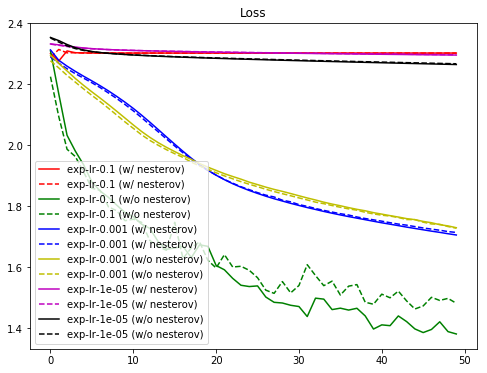

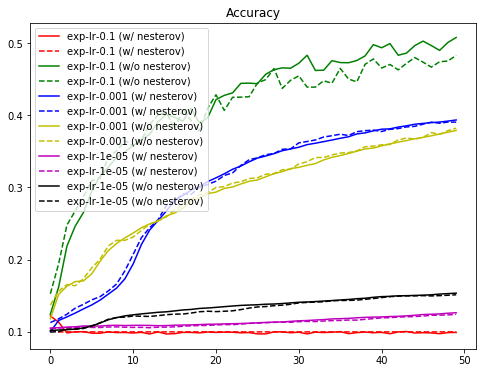

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()